In [ ]:
# Exercise 2 Rule-based and data-driven examples

In [1]:
# 1. In this task we need to download annotation files and info file.
import pandas as pd
colnames_1 = ['Time','Vtype','Variable','Value','Status']
colnames_2 = ['Fs','Start_date','Start_time','Label','Dimension','Coef1','Coef2','Coef3','Coef4','Nmb_chans','N']
df1 = pd.read_csv("annotation1.AN1", sep = ",", names = colnames_1, engine = "python", index_col = False, skiprows = 2)
df2 = pd.read_csv("annotation2.AN2", sep = ",", names = colnames_1, engine = "python", index_col = False, skiprows = 2)
info = pd.read_csv("info.txt", sep = ",", engine = "python", index_col = False, names = colnames_2)
# There is different variable types (automatic and manual), values and statuses in annotation files.
# The info file consist of times, dimensions, coefficients, etc.
# Data is collected with monitoring, computing and observing.

/var/folders/fg/6kftvk5d3jl2j5jb97hqg0000000gn/T/ipykernel_67666/306976114.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df1 = pd.read_csv("annotation1.AN1", sep = ",", names = colnames_1, engine = "python", index_col = False, skiprows = 2)
/var/folders/fg/6kftvk5d3jl2j5jb97hqg0000000gn/T/ipykernel_67666/306976114.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df2 = pd.read_csv("annotation2.AN2", sep = ",", names = colnames_1, engine = "python", index_col = False, skiprows = 2)


In [2]:
# 2. Finding different variables from AN1-file.
# a)
import numpy as np
ci = df1.loc[df1['Variable'] == 30001000]
ci_instances = np.shape(ci)
print("Amount of cardiac index instances in the dataset" ,ci_instances[0])
# b)
tp = df1.loc[df1['Variable'] == 400]
tp_instances = np.shape(tp)
print("Amount of peripheral temperature instances in the dataset" ,tp_instances[0])
# c)
pcwp = df1.loc[df1['Variable'] == 800]
pcwp_instances = np.shape(pcwp)
print("Amount of pulmonary capillary wedge pressure instances in the dataset" ,pcwp_instances[0])

Amount of cardiac index instances in the dataset 26
Amount of peripheral temperature instances in the dataset 699
Amount of pulmonary capillary wedge pressure instances in the dataset 25


In [3]:
# 3. Creating a rule-based function
conc_df = pd.concat([ci, tp, pcwp], axis = 0, ignore_index = True)
cd_lst = []
for i in conc_df.index:
    if conc_df['Variable'][i] == 30001000 and conc_df['Value'][i] < 2.0:
        cd_lst.append(1)
    elif conc_df['Variable'][i] == 400 and conc_df['Value'][i] < 32.5:
        cd_lst.append(1)
    elif conc_df['Variable'][i] == 800 and conc_df['Value'][i] > 10:
        cd_lst.append(1)
    else:
        cd_lst.append(0)
print('Cardiac failure cases:',cd_lst.count(1))

# Making the time vector
date_time_str = str(info['Start_date'][0][3:5]+ info['Start_date'][0][6:8]) # This gives from info the month and year.
time_vector = date_time_str + df1['Time'].astype(str) # Then concanating month and year to day, hour, minute, second.
time_vector = pd.to_datetime(time_vector, format='%m%y%d%H%M%S')
print(time_vector)

Cardiac failure cases: 216
0      1995-10-09 00:10:58
1      1995-10-09 10:00:58
2      1995-10-09 10:01:03
3      1995-10-09 10:01:03
4      1995-10-09 10:01:03
               ...        
9990   1995-10-10 09:59:30
9991   1995-10-10 09:59:30
9992   1995-10-10 09:59:30
9993   1995-10-10 09:59:30
9994   1995-10-10 09:59:30
Name: Time, Length: 9995, dtype: datetime64[ns]


/var/folders/fg/6kftvk5d3jl2j5jb97hqg0000000gn/T/ipykernel_67666/692819014.py:4: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df2 = pd.read_csv("annotation2.AN2", sep = ",", names = colnames_1, engine = "python", index_col = False, skiprows = 2)


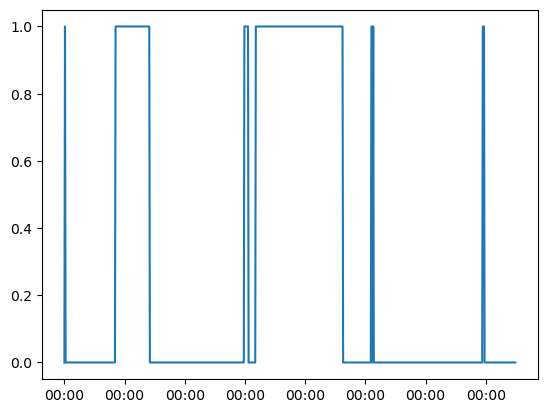

In [29]:
# 4. 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
df2 = pd.read_csv("annotation2.AN2", sep = ",", names = colnames_1, engine = "python", index_col = False, skiprows = 2)
time_vector = mdates.DateFormatter('%H:%M')
figure = plt.figure()
axes = figure.add_subplot(1, 1, 1)
axes.xaxis.set_major_formatter(time_vector)
plt.plot(cd_lst)